In [1]:
import sys
import numpy as np
import pandas as pd
import sklearn
import matplotlib
%matplotlib inline
print("python: {}".format(sys.version))
print("numpy: {}".format(np.__version__))
print("pandas: {}".format(pd.__version__))

print("sklearn: {}".format(sklearn.__version__))
print("matplotlib: {}".format(matplotlib.__version__))

python: 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
numpy: 1.18.1
pandas: 1.0.1
sklearn: 0.22.1
matplotlib: 3.1.3


In [2]:
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,recall_score
import matplotlib.pyplot  as plt

In [3]:
#1 Load the data. we are downloading the data from UCI machie learning repository
"""note that in this dataset the header information is not present. so we got that seperately and passed it via list in the right order"""
url="https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names=["id","Clump Thickness","Uniformity of Cell Size","Uniformity of Cell Shape","Marginal Adhesion","Single Epithelial Cell Size","Bare Nuclei","Bland Chromatin","Normal Nucleoli","Mitoses","Class"]

In [4]:
df=pd.read_csv(url,names=names)

In [5]:
df.head(20)

,id,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [5]:
"""now, since we have the data. Let's visualize it and try to get some insight.check for null entries and categorical values"""
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id                           699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [64]:
df["Bare Nuclei"][22]=1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [65]:
df["Bare Nuclei"].dtype

dtype('float64')

In [66]:
# this step is very important. Our data has some string value("?") and due to that we are not able to fit the data into the model
# so we will have to find these data and first convert them to Nan.
A=pd.Index(df["Bare Nuclei"][pd.to_numeric(df["Bare Nuclei"], errors='coerce').isnull()])

In [62]:
list=df.index[df["Bare Nuclei"] == "?"].tolist()
# df['Bare Nuclei'].replace('?','').astype(float)
# print(type(df['Bare Nuclei']))
print(list)

[]


In [67]:
#setting the values in these index to zero
for i in list:
    df["Bare Nuclei"][i]=5


In [68]:
df["Bare Nuclei"][40]

0.0

In [16]:
# Now we will  be able to convert the data type to float.
df["Bare Nuclei"]=df["Bare Nuclei"].astype(float)

In [17]:
df["Bare Nuclei"].dtype

dtype('float64')

In [18]:
print (df["Bare Nuclei"][pd.to_numeric(df["Bare Nuclei"], errors='coerce').isnull()])

Series([], Name: Bare Nuclei, dtype: float64)


In [19]:
df["Bare Nuclei"].dtype

dtype('float64')

In [20]:
df.describe()

,id,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.463519,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.640708,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [167]:
df.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.463519,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.640708,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [9]:
#lets drop the id as our model will not learn anything from this column. 
"""df.iloc[:,0]
df=df.drop(["id"],axis=1,inplace=True)"""
#can you spot an error in the above line code. we are assigning the dataframe after drop function to itself when we had passed inplace=True
# inplace=True, then no need to assign it to a variable. or else we will get a none type error.

'df.iloc[:,0]\ndf=df.drop(["id"],axis=1,inplace=True)'

In [21]:
df.drop(["id"],axis=1,inplace=True)
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2


In [22]:
df['Bare Nuclei'].iloc[698].dtype

dtype('float64')

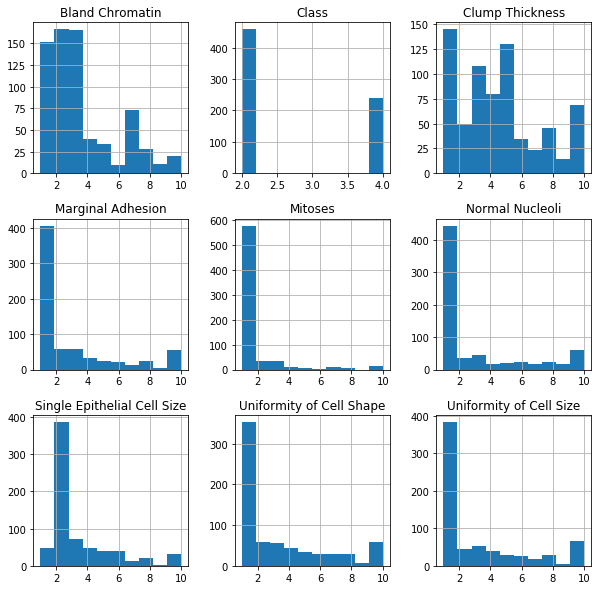

In [12]:
df.hist(figsize=(10,10))
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025736BE0808>,
      dtype=object)

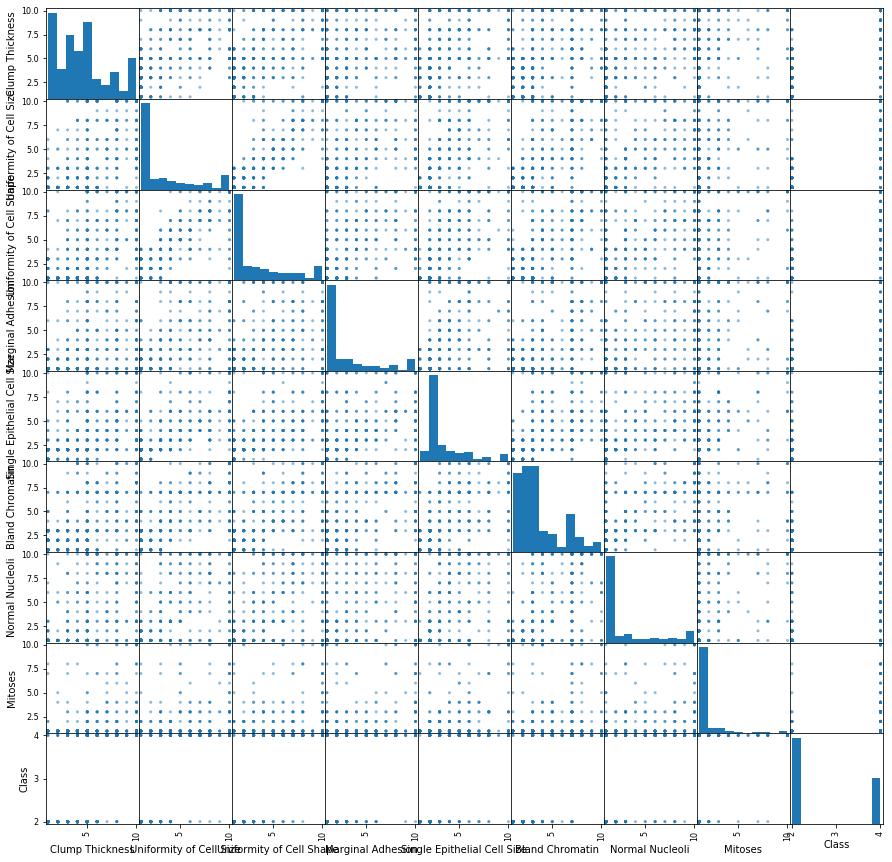

In [61]:
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(15,15))

In [177]:
df=df.astype(float)

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump Thickness              699 non-null    float64
 1   Uniformity of Cell Size      699 non-null    float64
 2   Uniformity of Cell Shape     699 non-null    float64
 3   Marginal Adhesion            699 non-null    float64
 4   Single Epithelial Cell Size  699 non-null    float64
 5   Bare Nuclei                  699 non-null    float64
 6   Bland Chromatin              699 non-null    float64
 7   Normal Nucleoli              699 non-null    float64
 8   Mitoses                      699 non-null    float64
 9   Class                        699 non-null    float64
dtypes: float64(10)
memory usage: 54.7 KB


In [23]:
from sklearn.model_selection import train_test_split
X=np.array(df.drop(["Class"],axis=1))
print(X.shape)
Y=np.array(df["Class"])
print(Y.shape)
print(type(X))

(699, 9)
(699,)
<class 'numpy.ndarray'>


In [24]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [25]:
print("train data shape: {}".format(X_train.shape))
print("train label shape: {}".format(Y_train.shape))

train data shape: (559, 9)
train label shape: (559,)


In [26]:
X_train.dtype

dtype('float64')

In [184]:
A=np.array(["12","13"])
A=A.astype("float")
A.dtype

dtype('float64')

In [27]:
df["Class"].describe()

count    699.000000
mean       2.689557
std        0.951273
min        2.000000
25%        2.000000
50%        2.000000
75%        4.000000
max        4.000000
Name: Class, dtype: float64

In [28]:
seed=8
scoring="accuracy"

In [29]:
from sklearn.neighbors import KNeighborsClassifier
type(Y_train)

numpy.ndarray

In [30]:
models=[]
models.append(("KNN",KNeighborsClassifier(n_neighbors=5)))
models.append(("SVM",SVC()))

In [31]:
from sklearn.model_selection import KFold

In [190]:
# KNN=KNeighborsClassifier(n_neighbors=10)
# kfold=sklearn.model_selection.KFold(n_splits=10,random_state=seed)
# cv_KNN=cross_val_score(KNN,X_train,Y_train,cv=kfold,scoring=scoring)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [36]:
results=[]
names=[]
for name, model in models:
    kfold=sklearn.model_selection.KFold(n_splits=10,random_state=seed)
    cv_result=cross_val_score(model,X_train,Y_train,cv=kfold,scoring=scoring)
    
    results.append(cv_result)
    names.append(name)
    msg=f"{name}: mean_score: {cv_result.mean()}, std: {cv_result.std()}"
    print(msg)

KNN: mean_score: 0.9624025974025974, std: 0.024614929506217426
SVM: mean_score: 0.9660064935064934, std: 0.018650640488261098


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [34]:
#note that upon increaing the n_neighbors to 10 increases the accuracy.
KNN=KNeighborsClassifier(n_neighbors=10)
kfold=sklearn.model_selection.KFold(n_splits=10,random_state=None)
# KNN.fit(X_train,Y_train)
cv_result=cross_val_score(KNN,X_train,Y_train,cv=kfold,scoring=scoring)

In [37]:
print(cv_result)

[0.96428571 0.96428571 0.96428571 0.92857143 0.98214286 1.
 0.98214286 0.96428571 0.94642857 0.96363636]


In [44]:
print(models)
KNN.fit(X_train,Y_train)
prediction=KNN.predict(X_test)

[('KNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')), ('SVM', SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False))]


In [40]:
prediction[3]

4

In [211]:
Y_test[100]

2.0

In [41]:
print(Y_test[3])

4


In [42]:
from sklearn.metrics import classification_report

In [43]:
classification_report(Y_test,prediction)

'              precision    recall  f1-score   support\n\n           2       0.97      0.99      0.98        95\n           4       0.98      0.93      0.95        45\n\n    accuracy                           0.97       140\n   macro avg       0.97      0.96      0.97       140\nweighted avg       0.97      0.97      0.97       140\n'

In [48]:
models=[]
models.append(("KNN",KNeighborsClassifier(n_neighbors=10)))
models.append(("SVM",SVC()))

In [49]:
models[0]

('KNN',
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                      weights='uniform'))

In [51]:

for name, model in models:
    model.fit(X_train,Y_train)
    predictions=model.predict(X_test)
    print(name)
    print(accuracy_score(Y_test,predictions))
    print(classification_report(Y_test,predictions))
          

KNN
0.9714285714285714
              precision    recall  f1-score   support

           2       0.97      0.99      0.98        95
           4       0.98      0.93      0.95        45

    accuracy                           0.97       140
   macro avg       0.97      0.96      0.97       140
weighted avg       0.97      0.97      0.97       140

SVM
0.9714285714285714
              precision    recall  f1-score   support

           2       0.98      0.98      0.98        95
           4       0.96      0.96      0.96        45

    accuracy                           0.97       140
   macro avg       0.97      0.97      0.97       140
weighted avg       0.97      0.97      0.97       140

